# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest

# Import Dataset

In [2]:
# Melakukan import dataset
df = pd.read_csv('/content/transaction_data.csv')
df.head()

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01


# Data Preporocessing

In [3]:
# Menampilkan jumlah missing value yang ada pada tiap kolom nya
df.isna().sum()

,0
Unnamed: 0,0
transaction_id,0
product_id,0
CustomerID,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197


In [4]:
'''
Dikarenakan jumlah missing value pada tiap kolomnya kurang dari 3% dari total data
maka saya akan melakukan drop missing value nya. Selain itu saya juga akan menghapus kolom "Unnamed: 0"
dikarenakan tidak ada informasi yang dapat diambil dari kolom tersebut.
'''
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [5]:
'''
setelah melakukan penghapusan missing value maka yang perlu dilakukan adalah melihat bagaimana persebaran tipe data
dari masing-masing kolom apakah sudah sesuai atau belum
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   CustomerID               19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  float64
 12  product_first_sold_date  19445 non-null  float64
 13  InvoiceDate              19445 non-null  object 
dtypes: float64(3), int64(3

In [6]:
'''
Setelah melihat informasi tipe data, bahwa terdapat hal yang janggal atau tidak sesuai dengan analisis yang akan dilakukan
yaitu pada kolom Invoice Date yang seharusnya bertipe datetime. Kemudian kita akan memeriksa kembali apakah sudah benar-benar terubah atau belum
'''
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  object        
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [7]:
data = df.copy

# Exploratory Data Analysis (1)

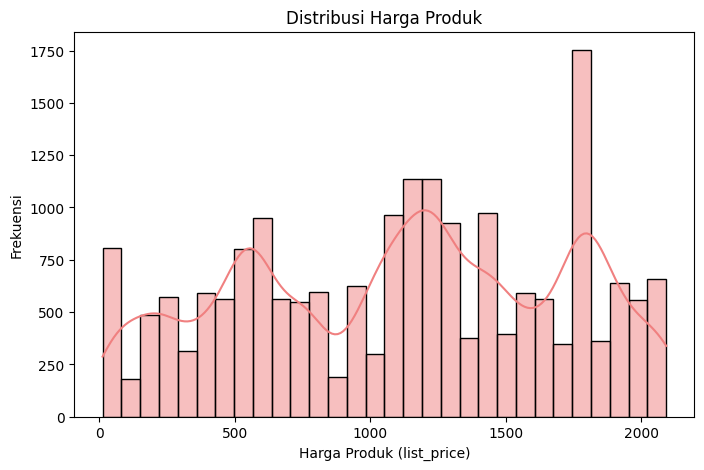

In [8]:
# 1. Histogram Distribusi Harga Produk
plt.figure(figsize=(8, 5))
sns.histplot(df['list_price'], bins=30, kde=True, color='lightcoral')
plt.xlabel('Harga Produk (list_price)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Produk')
plt.show()

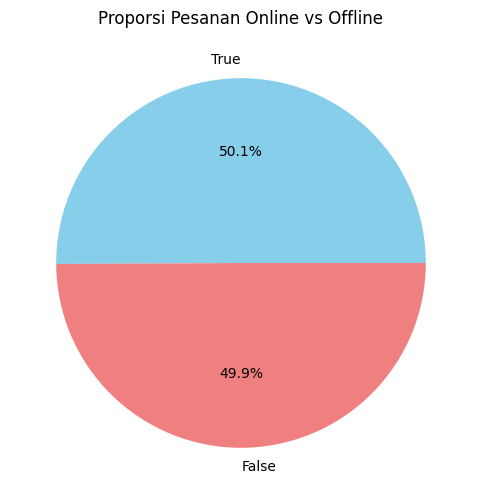

In [9]:
# 2. Pie Chart Proporsi Pesanan Online vs Offline
plt.figure(figsize=(6, 6))
df['online_order'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.ylabel('')
plt.title('Proporsi Pesanan Online vs Offline')
plt.show()

<ipython-input-10-e6616521ef6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['brand'], order=df['brand'].value_counts().index, palette='autumn')


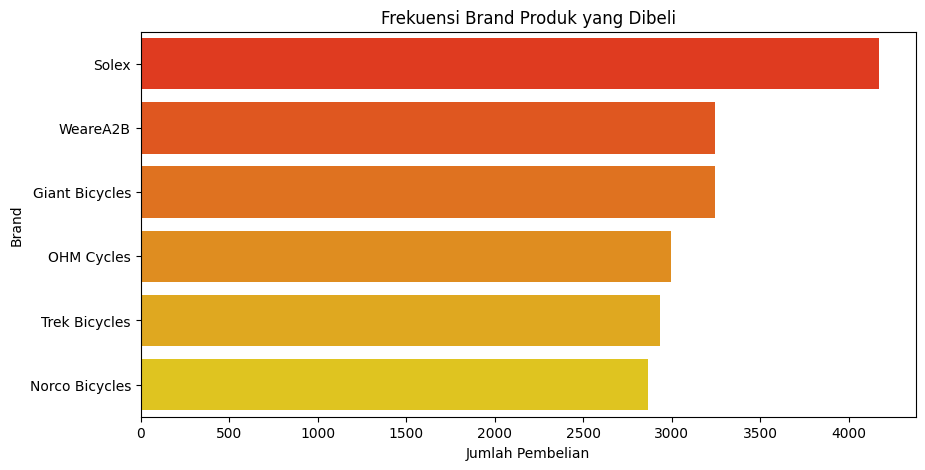

In [10]:
# 3. Bar Chart Frekuensi Brand Produk yang Dibeli
plt.figure(figsize=(10, 5))
sns.countplot(y=df['brand'], order=df['brand'].value_counts().index, palette='autumn')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Brand')
plt.title('Frekuensi Brand Produk yang Dibeli')
plt.show()

<ipython-input-11-7eaf3f99d9f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['order_status'], palette='pastel')


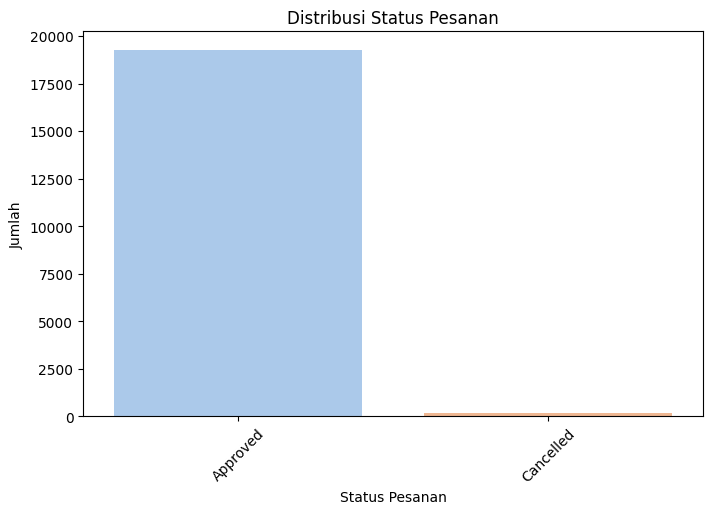

In [11]:
# 4. Bar Chart Distribusi Status Pesanan
plt.figure(figsize=(8, 5))
sns.countplot(x=df['order_status'], palette='pastel')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah')
plt.title('Distribusi Status Pesanan')
plt.xticks(rotation=45)
plt.show()

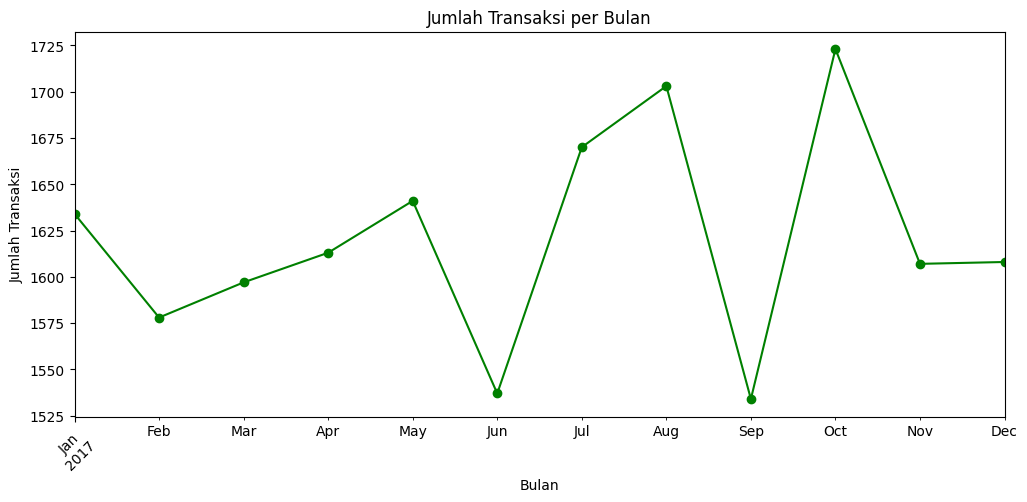

In [12]:
# Jumlah transaksi per bulan
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Month_Year'] = df['transaction_date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year').size()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='green', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi per Bulan')
plt.xticks(rotation=45)
plt.show()

In [13]:
'''
Pembuatan variabel dengan nama "numerik" yang berisikan kolom-kolom yang memiliki tipe data numerik (integer dan float).
Hal ini dibutuhkan untuk menguji distribusi setiap kolom numerik dalam data apakah normal atau tidak dengan menggunakan uji dari
Kolmogorov-Smirnov (KS Test).
'''
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk
numerik

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
0,1,2,2950,71.49,53.62,41245.0
1,2,3,3120,2091.47,388.92,41701.0
2,3,37,402,1793.43,248.82,36361.0
3,4,88,3135,1198.46,381.10,36145.0
4,5,78,787,1765.30,709.48,42226.0
...,...,...,...,...,...,...
19440,19996,51,1018,2005.66,1203.40,37823.0
19441,19997,41,127,416.98,312.74,35560.0
19442,19998,87,2284,1636.90,44.71,40410.0
19443,19999,6,2764,227.88,136.73,38216.0


In [14]:
# Statistik deskriptif dari semua kolom yang bertipe data numerik
numerik.describe()

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,1107.337193,555.585260,38201.758653
std,5779.669087,30.571996,1011.889153,582.662400,405.596541,2878.067854
min,1.000000,0.000000,1.000000,12.010000,7.210000,33259.000000
25%,4976.000000,18.000000,857.000000,575.270000,215.140000,35667.000000
50%,9985.000000,45.000000,1741.000000,1163.890000,507.580000,38216.000000
75%,14997.000000,72.000000,2615.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,2091.470000,1759.850000,42710.000000


In [15]:
# Pengujian distribusi suatu data menggunakan uji Kolmogorov-Smirnov (KS Test)

from scipy.stats import kstest

for nama_kolom in numerik.columns:
    stat, pval = kstest(df[nama_kolom], 'norm')
    if pval < 0.05:
        print(f'Kolom {nama_kolom} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'Kolom {nama_kolom}Distribusi normal (Terima H0)')

Kolom transaction_id Distribusi tidak normal (Tolak H0)
Kolom product_id Distribusi tidak normal (Tolak H0)
Kolom CustomerID Distribusi tidak normal (Tolak H0)
Kolom list_price Distribusi tidak normal (Tolak H0)
Kolom standard_cost Distribusi tidak normal (Tolak H0)
Kolom product_first_sold_date Distribusi tidak normal (Tolak H0)


In [16]:
'''
Setelah melihat visualisasi yang ada, kita memiliki data dengan status "cancelled" yang menandakan bahwa pelanggan membatalkan pesanan,
sehingga hal itu akan menggangu analisis RFM yang akan dilakukan. Oleh karena itu data yang mengandung order_status "cancelled" akan dihapus.
'''

df = df[df['order_status'] != 'Cancelled']

# Perhitungan Recency (R)

In [17]:
# Mencari hari terakhir pada data (tanggal terkini)

current_date = df['InvoiceDate'].max()
current_date

Timestamp('2017-12-30 00:00:00')

In [18]:
# Mencari tanggal terakhir (last transaction) untuk setiap customer

last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

,InvoiceDate
CustomerID,
1,2017-12-23
2,2017-08-24
3,2017-09-19
4,2017-06-18
5,2017-12-14
...,...
3497,2017-11-08
3498,2017-08-25
3499,2017-11-09


In [19]:
# mencari selisih antara tanggal terkini (current date) dan tanggal terakhir beli (last transaction)

recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

,Recency
CustomerID,
1,7
2,128
3,102
4,195
5,16
...,...
3497,52
3498,127
3499,51


# Perhitungan Frequency (F)

In [20]:
# Menghitung berpa kali setiap pelanggan melakukan transaksi
frequency = df.groupby('CustomerID')['transaction_id'].nunique().rename('Frequency')
frequency

,Frequency
CustomerID,
1,11
2,3
3,7
4,2
5,6
...,...
3497,3
3498,6
3499,7


# Perhitungan Monetary (M)

In [21]:
# Menghitung jumlah total nominal yang dikeluarkan oleh setiap pelanggan dari keseluruhan pembelian dalam 1 tahun
monetary = df.groupby('CustomerID')['list_price'].sum().rename('Monetary')
monetary

,Monetary
CustomerID,
1,9084.45
2,4149.07
3,9525.22
4,1047.72
5,5903.20
...,...
3497,3744.07
3498,5177.06
3499,7673.48


In [22]:
'''
Membuat dataframe baru yang berisikan CustomerID sebagai nilai unique nya, kemudian ada pula tambahan kolom untuk analisis RFM
seperti Recency, Frequency, dan Monetary.
'''

rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,7,9525.22
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3485,3497,52,3,3744.07
3486,3498,127,6,5177.06
3487,3499,51,7,7673.48
3488,3500,144,6,4922.41


# Exploratory Data Analysis (2)

In [23]:
round(rfm.describe(),2)

,CustomerID,Recency,Frequency,Monetary
count,3490.00,3490.00,3490.00,3490.00
mean,1750.09,62.85,5.52,6113.58
std,1011.35,59.37,2.28,2898.02
min,1.00,0.00,1.00,60.34
25%,876.25,18.00,4.00,4023.00
50%,1749.50,45.00,5.00,5829.05
75%,2622.75,88.00,7.00,7934.46
max,5034.00,353.00,14.00,19071.32


- Recency
    - customer kita kebanyakan terakhir membeli sekitar 18-88 hari yang lalu (cukup baru)
- Frequency
    - customer kita kebanyakan baru 4 sampai 7 kali membeli
- Monetary
    - customer kita kebanyakan jumlah nominalnya tidak terlalu besar sekitar 4000 - 7900 dollar

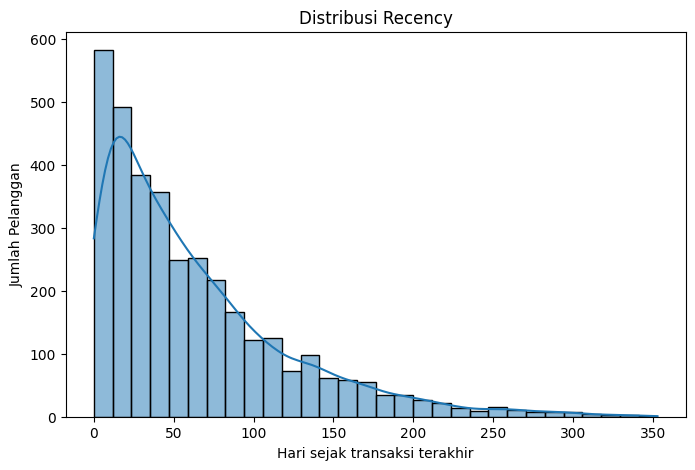

In [24]:
# Histogram Recency
plt.figure(figsize=(8,5))
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribusi Recency')
plt.xlabel('Hari sejak transaksi terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.show()

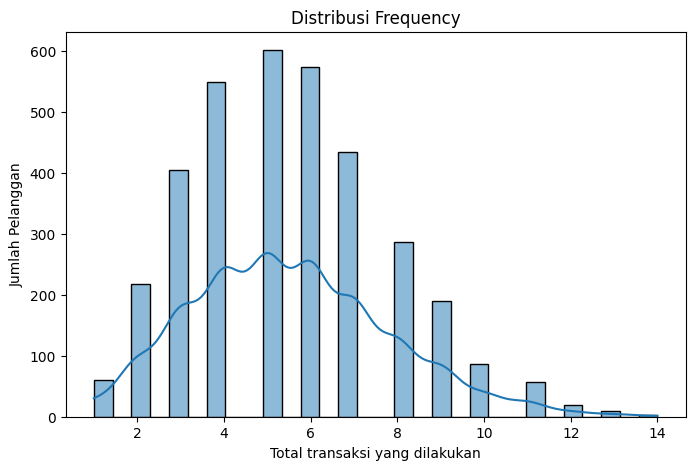

In [25]:
# Histogram Frequency
plt.figure(figsize=(8,5))
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title('Distribusi Frequency')
plt.xlabel('Total transaksi yang dilakukan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

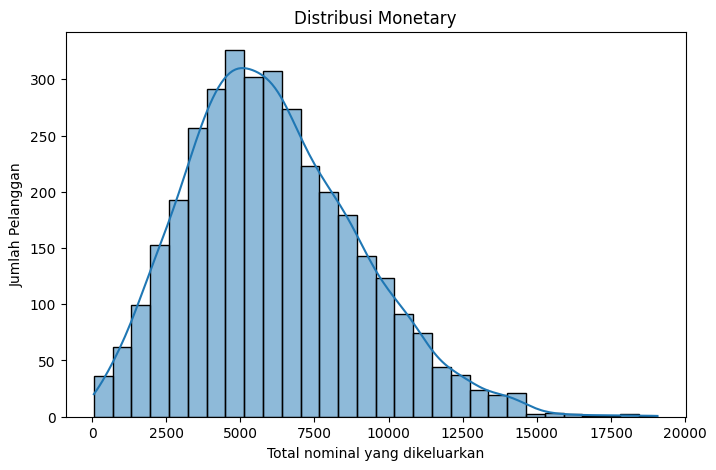

In [26]:
# Histogram Monetary
plt.figure(figsize=(8,5))
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title('Distribusi Monetary')
plt.xlabel('Total nominal yang dikeluarkan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# RFM Scoring

In [27]:
def rfm_score(baris):
    # recency
    if baris['Recency'] <= 18: #Q1
        r = 4
    elif baris['Recency'] <= 45: # Q2
        r = 3
    elif baris['Recency'] <= 88: # Q3
        r = 2
    else:
        r = 1

    # fequency
    if baris['Frequency'] <= 3: #Q1
        f = 1
    elif baris['Frequency'] <= 5: # Q2
        f = 2
    elif baris['Frequency'] <= 10: # Q3
        f = 3
    else:
        f = 4

    # monetary
    if baris['Monetary'] <= 4000: #Q1
        m = 1
    elif baris['Monetary'] <= 5800: # Q2
        m = 2
    elif baris['Monetary'] <= 7900: # Q3
        m = 3
    else:
        m = 4

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,4,4,4,12
1,2,128,3,4149.07,1,1,2,4
2,3,102,7,9525.22,1,3,4,8
3,4,195,2,1047.72,1,1,1,3
4,5,16,6,5903.20,4,3,3,10
...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4
3486,3498,127,6,5177.06,1,3,2,6
3487,3499,51,7,7673.48,2,3,3,8
3488,3500,144,6,4922.41,1,3,2,6


In [28]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000
mean,1750.092837,62.847564,5.522350,6113.584424,2.512607,2.305444,2.508596,7.326648
std,1011.348380,59.365082,2.275693,2898.017543,1.124768,0.808807,1.119442,2.399820
min,1.000000,0.000000,1.000000,60.340000,1.000000,1.000000,1.000000,3.000000
25%,876.250000,18.000000,4.000000,4023.002500,2.000000,2.000000,2.000000,5.000000
50%,1749.500000,45.000000,5.000000,5829.050000,3.000000,2.000000,3.000000,8.000000
75%,2622.750000,88.000000,7.000000,7934.462500,4.000000,3.000000,4.000000,9.000000
max,5034.000000,353.000000,14.000000,19071.320000,4.000000,4.000000,4.000000,12.000000


In [29]:
# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    scoreRFM = row['RFM_Score']

    if scoreRFM >= 9:
        return 'High-Value Customers'
    elif scoreRFM >= 5:
        return 'Mid-Value Customers'
    else:
        return 'Low-Value Customers'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
0,1,7,11,9084.45,4,4,4,12,High-Value Customers
1,2,128,3,4149.07,1,1,2,4,Low-Value Customers
2,3,102,7,9525.22,1,3,4,8,Mid-Value Customers
3,4,195,2,1047.72,1,1,1,3,Low-Value Customers
4,5,16,6,5903.20,4,3,3,10,High-Value Customers
...,...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4,Low-Value Customers
3486,3498,127,6,5177.06,1,3,2,6,Mid-Value Customers
3487,3499,51,7,7673.48,2,3,3,8,Mid-Value Customers
3488,3500,144,6,4922.41,1,3,2,6,Mid-Value Customers


# Segmentasi

In [30]:
Segmentation = rfm['Customer_Segment'].value_counts().rename('Jumlah')
Segmentation

,Jumlah
Customer_Segment,
Mid-Value Customers,1724
High-Value Customers,1242
Low-Value Customers,524


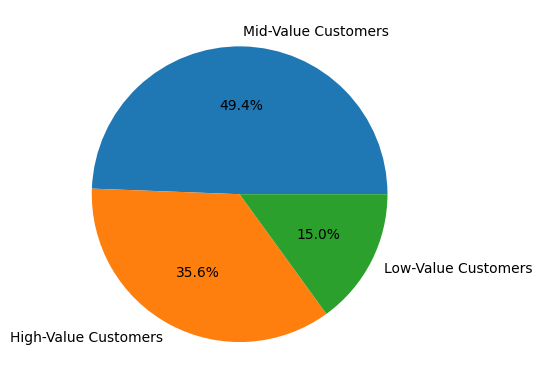

In [31]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()